# Determining Strength of Iron Nickel Alloys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import stats

**Import:**

In [2]:
path = '.../FeNi20_55GPa/FeNi20_55GPa_'

filename = glob.glob(path+'*.xlsx')

In [3]:
filename

['/Users/turtle26mr/Desktop/FeNi20_55GPa/FeNi20_55GPa_103.xlsx',
 '/Users/turtle26mr/Desktop/FeNi20_55GPa/FeNi20_55GPa_101.xlsx',
 '/Users/turtle26mr/Desktop/FeNi20_55GPa/FeNi20_55GPa_100.xlsx',
 '/Users/turtle26mr/Desktop/FeNi20_55GPa/FeNi20_55GPa_202.xlsx',
 '/Users/turtle26mr/Desktop/FeNi20_55GPa/FeNi20_55GPa_110.xlsx',
 '/Users/turtle26mr/Desktop/FeNi20_55GPa/FeNi20_55GPa_002.xlsx']

In [4]:
path = '/Users/turtle26mr/Desktop/FeNi20_55GPa/'
data = {}

for f in filename:
    d = pd.read_excel(f)
    key = f.replace(path, '').replace('.xlsx', '')
    data[key] = d

**Explore:**

In [5]:
data.keys()

dict_keys(['FeNi20_55GPa_103', 'FeNi20_55GPa_101', 'FeNi20_55GPa_100', 'FeNi20_55GPa_202', 'FeNi20_55GPa_110', 'FeNi20_55GPa_002'])

In [6]:
data['FeNi20_55GPa_002']

,angle,dpacing,theta,d_0
0,15,1.915882,6.19520,1.8847
1,25,1.914912,6.19835,NaN
2,35,1.916637,6.19275,NaN
3,45,1.918905,6.18540,NaN
4,55,1.922853,6.17265,NaN
5,65,1.927972,6.15620,NaN
6,75,1.930299,6.14875,NaN
7,85,1.931003,6.14650,NaN
8,95,1.930877,6.14690,NaN
9,105,1.929970,6.14980,NaN


In [7]:
for key in data:
    print(data[key].head())

   azithmal slice  dpacing   theta     d_0
0               5       NaN    NaN  1.0699
1              15       NaN    NaN     NaN
2              25       NaN    NaN     NaN
3              35       NaN    NaN     NaN
4              45       NaN    NaN     NaN
   angle   dpacing    theta     d_0
0      5       NaN      NaN  1.7943
1     15       NaN      NaN     NaN
2     25  1.804222  6.58025     NaN
3     35  1.804905  6.57775     NaN
4     45  1.808463  6.56475     NaN
   angle  dspacing    theta     d_0
0      5       NaN      NaN  2.0403
1     15       NaN      NaN     NaN
2     25       NaN  5.99450     NaN
3     35  2.040849  5.81450     NaN
4     45  2.043774  5.80615     NaN
   azithmal slice  dpacing   theta     d_0
0               5       NaN    NaN  0.9991
1              15       NaN    NaN     NaN
2              25       NaN    NaN     NaN
3              35       NaN    NaN     NaN
4              45       NaN    NaN     NaN
   angle  dspacing      theta     d_0
0     55   1.4


A lot of NaN values and inconsistent column names


In [8]:
data['FeNi20_55GPa_202'] = data['FeNi20_55GPa_202'].rename(columns = {'azithmal slice': 'angle'})
data['FeNi20_55GPa_103'] = data['FeNi20_55GPa_103'].rename(columns = {'azithmal slice': 'angle'})
for key in data:
    data[key] = data[key].rename(columns = {data[key].columns[1]: 'dspacing'})


Create a new dictionary of just d0 values for later


In [9]:
all_d0 = {key: data[key]['d_0'][0] for (key, value) in data.items()}


Need to fill in missing d_0 values and drop the remaining null values


In [10]:
for key in data:
    data[key]['d_0'] = data[key]['d_0'].fillna(method = 'ffill') 
    data[key] = data[key].dropna(how = 'any')


Check to make sure data types are correct-- sometimes data is a string instead of a number


In [11]:
for key in data:
    print(data[key].dtypes)

angle         int64
dspacing    float64
theta       float64
d_0         float64
dtype: object
angle         int64
dspacing    float64
theta       float64
d_0         float64
dtype: object
angle         int64
dspacing    float64
theta       float64
d_0         float64
dtype: object
angle         int64
dspacing    float64
theta       float64
d_0         float64
dtype: object
angle         int64
dspacing    float64
theta       float64
d_0         float64
dtype: object
angle         int64
dspacing    float64
theta       float64
d_0         float64
dtype: object


In [12]:
for key in data:
    print(data[key].isnull().sum())

angle       0
dspacing    0
theta       0
d_0         0
dtype: int64
angle       0
dspacing    0
theta       0
d_0         0
dtype: int64
angle       0
dspacing    0
theta       0
d_0         0
dtype: int64
angle       0
dspacing    0
theta       0
d_0         0
dtype: int64
angle       0
dspacing    0
theta       0
d_0         0
dtype: int64
angle       0
dspacing    0
theta       0
d_0         0
dtype: int64




**Data Analysis:**
Need to define and calculate Cos(phi) and Epsilon to obtain average Q (hkl)

$d_m(hlk)=d_p(hkl)[1+(1-3 cos^2\psi)  Q (hkl)]$

$e(hkl) = [d_m(hlk)- d_p(hkl)] / d_p(hkl)$



In [13]:
def cosphi(df, col1, col2):
    eta = 70*3.14/180
    df['ang_rad'] = np.radians(df[col1])
    df['theta_rad'] = np.radians(df[col2])
    df['cosphi'] = np.cos(df['ang_rad'])*np.cos(df['theta_rad'])*np.sin(eta) - np.sin(df['theta_rad'])*np.cos(eta)
    df['cosphi'] = 1-3*df['cosphi']**2
    return df['cosphi']



Check if works:



In [14]:
data['FeNi20_55GPa_002']['cosphi'] = cosphi(data['FeNi20_55GPa_002'], 'angle', 'theta')

In [15]:
data['FeNi20_55GPa_002']

,angle,dspacing,theta,d_0,ang_rad,theta_rad,cosphi
0,15,1.915882,6.19520,1.8847,0.261799,0.108127,-1.245696
1,25,1.914912,6.19835,1.8847,0.436332,0.108182,-0.965822
2,35,1.916637,6.19275,1.8847,0.610865,0.108084,-0.590515
3,45,1.918905,6.18540,1.8847,0.785398,0.107956,-0.166376
4,55,1.922853,6.17265,1.8847,0.959931,0.107733,0.253292
5,65,1.927972,6.15620,1.8847,1.134464,0.107446,0.615483
6,75,1.930299,6.14875,1.8847,1.308997,0.107316,0.873851
7,85,1.931003,6.14650,1.8847,1.483530,0.107277,0.993998
8,95,1.930877,6.14690,1.8847,1.658063,0.107284,0.958160
9,105,1.929970,6.14980,1.8847,1.832596,0.107334,0.767383


In [17]:
def epsilon(dic, col, dic2, key):
    dic[key]['epsilon'] = (dic[key][col] - dic2[key]) / dic2[key]
    return dic[key]['epsilon']


Check if works


In [18]:
epsilon(data, 'dspacing', all_d0, 'FeNi20_55GPa_002' )
print(data['FeNi20_55GPa_002'])

    angle  dspacing    theta     d_0   ang_rad  theta_rad    cosphi   epsilon
0      15  1.915882  6.19520  1.8847  0.261799   0.108127 -1.245696  0.016545
1      25  1.914912  6.19835  1.8847  0.436332   0.108182 -0.965822  0.016030
2      35  1.916637  6.19275  1.8847  0.610865   0.108084 -0.590515  0.016945
3      45  1.918905  6.18540  1.8847  0.785398   0.107956 -0.166376  0.018149
4      55  1.922853  6.17265  1.8847  0.959931   0.107733  0.253292  0.020244
5      65  1.927972  6.15620  1.8847  1.134464   0.107446  0.615483  0.022959
6      75  1.930299  6.14875  1.8847  1.308997   0.107316  0.873851  0.024194
7      85  1.931003  6.14650  1.8847  1.483530   0.107277  0.993998  0.024568
8      95  1.930877  6.14690  1.8847  1.658063   0.107284  0.958160  0.024501
9     105  1.929970  6.14980  1.8847  1.832596   0.107334  0.767383  0.024020
10    115  1.927099  6.15900  1.8847  2.007129   0.107495  0.441405  0.022496
11    125  1.922311  6.17440  1.8847  2.181662   0.107764  0.016

In [18]:
for key in data:
    data[key]['cosphi'] = cosphi(data[key], 'angle', 'theta')
    data[key]['epsilon'] = epsilon(data, 'dspacing', all_d0, key) 

In [19]:
print(data['FeNi20_55GPa_103'])



    angle  dspacing      theta     d_0   ang_rad  theta_rad    cosphi  \
5      55  1.081485  11.021400  1.0699  0.959931   0.192360  0.355704   
6      65  1.081315  11.023150  1.0699  1.134464   0.192390  0.684666   
7      75  1.081742  11.018750  1.0699  1.308997   0.192313  0.910014   
10    105  1.079980  11.036950  1.0699  1.832596   0.192631  0.722302   
11    115  1.081746  11.018700  1.0699  2.007129   0.192313  0.378369   
12    125  1.081184  11.024500  1.0699  2.181662   0.192414 -0.060058   
13    135  1.073639  11.102955  1.0699  2.356194   0.193783 -0.545946   
14    145  1.079092  11.046150  1.0699  2.530727   0.192792 -1.021936   
15    155  1.077290  11.064850  1.0699  2.705260   0.193118 -1.437472   
16    165  1.076551  11.072550  1.0699  2.879793   0.193252 -1.743949   
17    175  1.076359  11.074550  1.0699  3.054326   0.193287 -1.906459   
18    185  1.076397  11.074150  1.0699  3.228859   0.193280 -1.906452   
19    195  1.076488  11.073200  1.0699  3.403392   

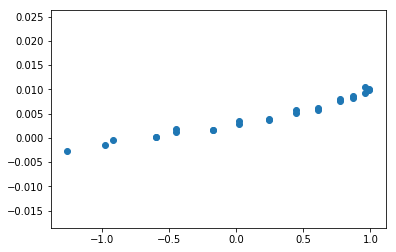

In [20]:
plt.scatter( x = data['FeNi20_55GPa_100']['cosphi'], 
            y =data['FeNi20_55GPa_100']['epsilon'])
#plt.ylim(0.01, .03)

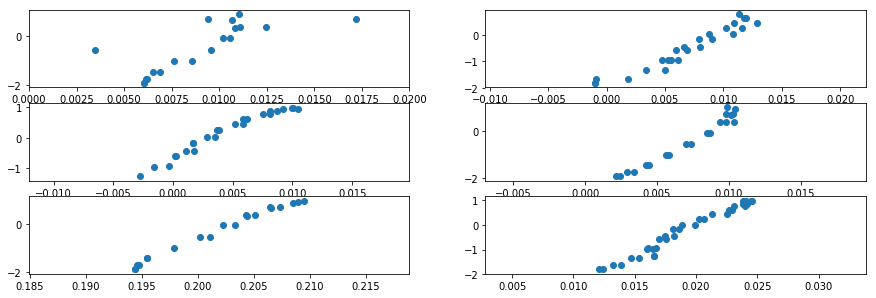

In [24]:
dspace = plt.figure(figsize = (15,10))
ax1 = plt.subplot(6, 2, 1)
ax1.set_xlim(0, .02)
ax2 = plt.subplot(6,2,2)
ax3 = plt.subplot(6,2,3)
ax4 = plt.subplot(6,2,4)
ax5 = plt.subplot(6,2,5)
ax6 = plt.subplot(6,2,6)
ax1.scatter(data['FeNi20_55GPa_103']['epsilon'], data['FeNi20_55GPa_103']['cosphi'])
ax2.scatter(data['FeNi20_55GPa_101']['epsilon'], data['FeNi20_55GPa_101']['cosphi']) 
ax3.scatter(data['FeNi20_55GPa_100']['epsilon'], data['FeNi20_55GPa_100']['cosphi']) 
ax4.scatter(data['FeNi20_55GPa_202']['epsilon'], data['FeNi20_55GPa_202']['cosphi']) 
ax5.scatter(data['FeNi20_55GPa_110']['epsilon'], data['FeNi20_55GPa_110']['cosphi']) 
ax6.scatter(data['FeNi20_55GPa_002']['epsilon'], data['FeNi20_55GPa_002']['cosphi']) 


There are some outliers in FeNi20_55GPa_103...


In [23]:
#Alternative model import statsmodels.api as sm
#model = sm.OLS(y, X).fit()


Time to fit the data



In [25]:
def fit(dic, key):
    y = dic[key]['epsilon'];
    x = dic[key]['cosphi']
    fitted = stats.linregress(x, y)
    return fitted

In [26]:
all_keys = [key for key in data]
print(all_keys)

['FeNi20_55GPa_103', 'FeNi20_55GPa_101', 'FeNi20_55GPa_100', 'FeNi20_55GPa_202', 'FeNi20_55GPa_110', 'FeNi20_55GPa_002']


In [27]:
fit_data = [fit(data, key) for key in all_keys]
fit_data = pd.DataFrame(fit_data)
fit_data.index = all_keys
fit_data.columns = 'slope','intercept','r_value','p_value','std_err'                          

In [28]:
fit_data

,slope,intercept,r_value,p_value,std_err
FeNi20_55GPa_103,0.002380,0.010143,0.773878,1.011991e-04,0.000472
FeNi20_55GPa_101,0.004901,0.009382,0.964488,8.559179e-15,0.000280
FeNi20_55GPa_100,0.005491,0.003522,0.979797,1.405848e-17,0.000234
FeNi20_55GPa_202,0.002812,0.008311,0.983341,8.837498e-15,0.000123
FeNi20_55GPa_110,0.005100,0.203317,0.993754,1.343343e-18,0.000135
FeNi20_55GPa_002,0.004031,0.020073,0.984741,7.110532e-26,0.000126



The r-value for the fit on 'FeNi20_55GPa_103' is low at 0.77. Should remove the outliers.



In [29]:
FeNi20_55GPa_103_epsilon = data['FeNi20_55GPa_103']['epsilon'] 
outliers_removed =  FeNi20_55GPa_103_epsilon[(FeNi20_55GPa_103_epsilon > .005) & (FeNi20_55GPa_103_epsilon <0.015)]
print (FeNi20_55GPa_103_epsilon)
print(outliers_removed)

5     0.010828
6     0.010669
7     0.011068
10    0.009421
11    0.011073
12    0.010547
13    0.003495
14    0.008591
15    0.006908
16    0.006216
17    0.006037
18    0.006073
19    0.006158
20    0.006517
21    0.007600
22    0.009584
23    0.010208
24    0.012466
25    0.017177
Name: epsilon, dtype: float64
5     0.010828
6     0.010669
7     0.011068
10    0.009421
11    0.011073
12    0.010547
14    0.008591
15    0.006908
16    0.006216
17    0.006037
18    0.006073
19    0.006158
20    0.006517
21    0.007600
22    0.009584
23    0.010208
24    0.012466
Name: epsilon, dtype: float64


In [31]:
data['FeNi20_55GPa_103']['epsilon'] = outliers_removed
print(data['FeNi20_55GPa_103'])

    angle  dspacing      theta     d_0   ang_rad  theta_rad    cosphi  \
5      55  1.081485  11.021400  1.0699  0.959931   0.192360  0.355704   
6      65  1.081315  11.023150  1.0699  1.134464   0.192390  0.684666   
7      75  1.081742  11.018750  1.0699  1.308997   0.192313  0.910014   
10    105  1.079980  11.036950  1.0699  1.832596   0.192631  0.722302   
11    115  1.081746  11.018700  1.0699  2.007129   0.192313  0.378369   
12    125  1.081184  11.024500  1.0699  2.181662   0.192414 -0.060058   
13    135  1.073639  11.102955  1.0699  2.356194   0.193783 -0.545946   
14    145  1.079092  11.046150  1.0699  2.530727   0.192792 -1.021936   
15    155  1.077290  11.064850  1.0699  2.705260   0.193118 -1.437472   
16    165  1.076551  11.072550  1.0699  2.879793   0.193252 -1.743949   
17    175  1.076359  11.074550  1.0699  3.054326   0.193287 -1.906459   
18    185  1.076397  11.074150  1.0699  3.228859   0.193280 -1.906452   
19    195  1.076488  11.073200  1.0699  3.403392   


Drop NaN values after outlier removal, refit the data and add it back to fit dataframe


In [32]:
data['FeNi20_55GPa_103'] = data['FeNi20_55GPa_103'].dropna()

In [34]:
FeNi20_55GPa_103 = fit(data, 'FeNi20_55GPa_103')
fit_data.loc['FeNi20_55GPa_103', :] =  FeNi20_55GPa_103

In [35]:
fit_data


,slope,intercept,r_value,p_value,std_err
FeNi20_55GPa_103,0.001980,0.009923,0.930125,6.434389e-08,0.000202
FeNi20_55GPa_101,0.004901,0.009382,0.964488,8.559179e-15,0.000280
FeNi20_55GPa_100,0.005491,0.003522,0.979797,1.405848e-17,0.000234
FeNi20_55GPa_202,0.002812,0.008311,0.983341,8.837498e-15,0.000123
FeNi20_55GPa_110,0.005100,0.203317,0.993754,1.343343e-18,0.000135
FeNi20_55GPa_002,0.004031,0.020073,0.984741,7.110532e-26,0.000126


Check how the data and fit look

Text(0.5, 1.0, 'FeNi20 55GPa 110')

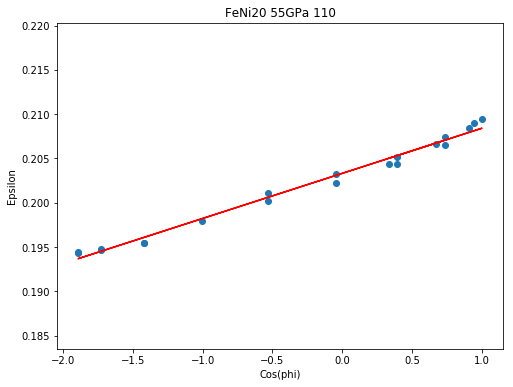

In [36]:
y = data['FeNi20_55GPa_110']['epsilon']
x = data['FeNi20_55GPa_110']['cosphi']
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x, y)
ax.plot(x, x*0.0051+.203317,'r')
ax.set_xlabel('Cos(phi)')
ax.set_ylabel('Epsilon')
ax.set_title('FeNi20 55GPa 110')


Time to plot all data and fits


In [37]:
x1 = data['FeNi20_55GPa_103']['cosphi'] 
x2 = data['FeNi20_55GPa_101']['cosphi']
x3 = data['FeNi20_55GPa_100']['cosphi']
x4 = data['FeNi20_55GPa_202']['cosphi']
x5 = data['FeNi20_55GPa_110']['cosphi']
x6 = data['FeNi20_55GPa_002']['cosphi']

fit1 = fit_data.iloc[0][0]*x1 + fit_data.iloc[0][1]
fit2 = fit_data.iloc[1][0]*x2 + fit_data.iloc[1][1]
fit3 = fit_data.iloc[2][0]*x3 + fit_data.iloc[2][1]
fit4 = fit_data.iloc[3][0]*x4 + fit_data.iloc[3][1]
fit5 = fit_data.iloc[4][0]*x5 + fit_data.iloc[4][1]
fit6 = fit_data.iloc[5][0]*x6 + fit_data.iloc[5][1]

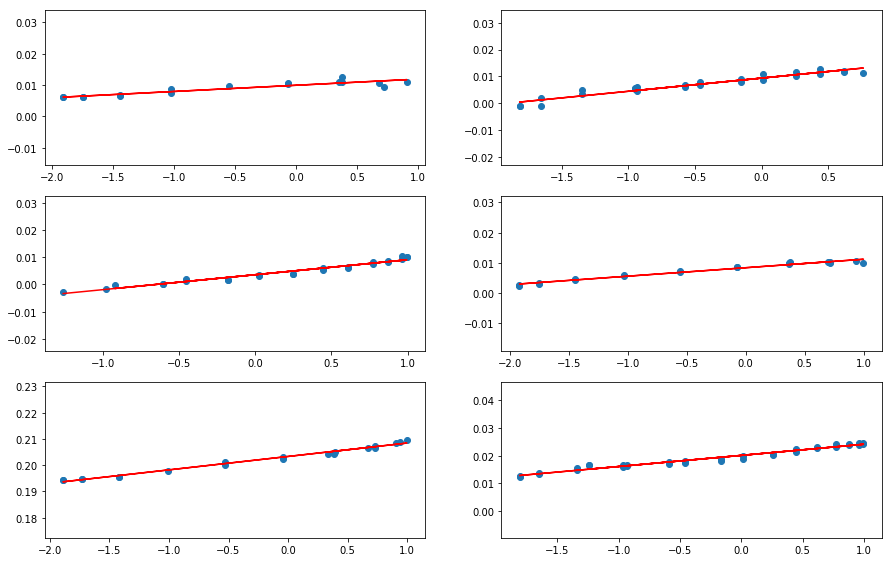

In [38]:
dspace = plt.figure(figsize = (15,20))
ax1 = plt.subplot(6, 2, 1)
ax2 = plt.subplot(6,2,2)
ax3 = plt.subplot(6,2,3)
ax4 = plt.subplot(6,2,4)
ax5 = plt.subplot(6,2,5)
ax6 = plt.subplot(6,2,6)

ax1.scatter(data['FeNi20_55GPa_103']['cosphi'], data['FeNi20_55GPa_103']['epsilon'])
ax1.plot(x1, fit1, 'r')

ax2.scatter(data['FeNi20_55GPa_101']['cosphi'], data['FeNi20_55GPa_101']['epsilon']) 
ax2.plot(x2, fit2, 'r')

ax3.scatter(data['FeNi20_55GPa_100']['cosphi'], data['FeNi20_55GPa_100']['epsilon']) 
ax3.plot(x3, fit3, 'r')

ax4.scatter(data['FeNi20_55GPa_202']['cosphi'], data['FeNi20_55GPa_202']['epsilon']) 
ax4.plot(x4, fit4, 'r')

ax5.scatter(data['FeNi20_55GPa_110']['cosphi'], data['FeNi20_55GPa_110']['epsilon'])
ax5.plot(x5, fit5, 'r')

ax6.scatter(data['FeNi20_55GPa_002']['cosphi'], data['FeNi20_55GPa_002']['epsilon'])
ax6.plot(x6, fit6, 'r')

Everything looks good. Can calculate Q(hkl) and strength for this data point

In [39]:
Average_Q_55GPa = fit_data.loc[:, 'slope'].mean()

In [40]:
Average_Q_55GPa

0.004052405783566826

In [41]:
Strength = 6*168*Average_Q_55GPa
print(Strength)

4.084825029835361


Repeat process as more data comes in!

...Shortcut to all the processed data...


In [42]:
FeNi10_data = {'pressure': [21, 24, 29, 47, 43, 52, 57, 60], 
               'strength': [1.98203075, 2.085004152, 2.17724199, 2.3, 2.17724199, 2.3, 2.4133, 2.454]}

FeNi10 = pd.DataFrame(FeNi10_data)

FeNi20_data = { 'pressure': [35 ,39, 43, 51,  53, 55, 60, 64, 69, 70], 
                'strength': [1.5795, 2.578, 2.424, 2.8, 3, 4.08, 4.0449474, 3.5, 4.2, 4] }
FeNi20 = pd.DataFrame(FeNi20_data)

Fe_data = { 'pressure' :[0, 21, 47, 75] , 'strength': [1.82,  2.157, 2.599, 3.075,] }
Fe = pd.DataFrame(Fe_data)

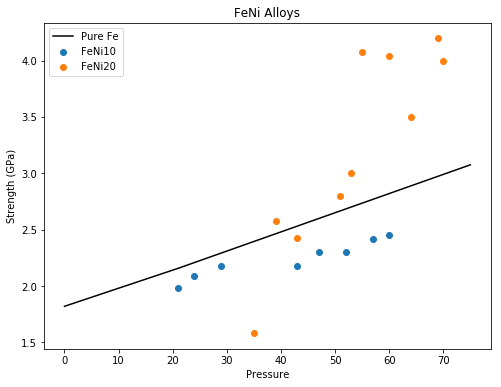

In [43]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(FeNi10['pressure'], FeNi10['strength'], label = 'FeNi10')
ax.scatter(FeNi20['pressure'], FeNi20['strength'], label = 'FeNi20')
ax.plot(Fe['pressure'], Fe['strength'], 'black', label = 'Pure Fe')

ax.set_xlabel('Pressure')
ax.set_ylabel('Strength (GPa)')
ax.set_title('FeNi Alloys')
ax.legend()

What does this mean for the Earth?
